In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:

# Data
data = {
    'Number UEs str': [16, 32, 64, 128, 256, 512, 1024],
    'Avg CPU (millicores)': [0.00073 * 1000, 0.00075 * 1000, 0.00085 * 1000, 0.00091 * 1000, 0.00097 * 1000, 0.00103 * 1000, 0.00109 * 1000],
    'Std Dev CPU': [0.00026 * 1000, 0.00019 * 1000, 0.00034 * 1000, 0.00027 * 1000, 0.00039 * 1000, 0.00041 * 1000, 0.00038 * 1000],
    'Avg Memory (MB)': [6.68, 6.69, 7.25, 7.49, 7.53, 7.57, 7.61],
    'Std Dev Memory': [0.47, 0.4, 0.51, 0.6, 0.53, 0.61, 0.46],
    'Time (ms)': [0.024024069 * 1000, 0.031508116 * 1000, 0.040097032 * 1000, 0.062052087 * 1000, 0.095843842 * 1000, 0.147976187 * 1000, 0.23256436 * 1000],
    'Std Dev Time': [0.01 * 1000, 0.015 * 1000, 0.016 * 1000, 0.028 * 1000, 0.043 * 1000, 0.059 * 1000, 0.093 * 1000],
    'Time by UE (ms)': [1.501504, 0.984629, 0.626516, 0.484782, 0.37439, 0.289016, 0.227114],
    'Std Time by UE (ms)': [0.625, 0.46875, 0.25, 0.21875, 0.16797, 0.11523, 0.09082]
}

df = pd.DataFrame(data)

df = pd.DataFrame(data)
df['Number UEs number'] = df['Number UEs str'].astype(int)

# Set seaborn style
sns.set(style="darkgrid")

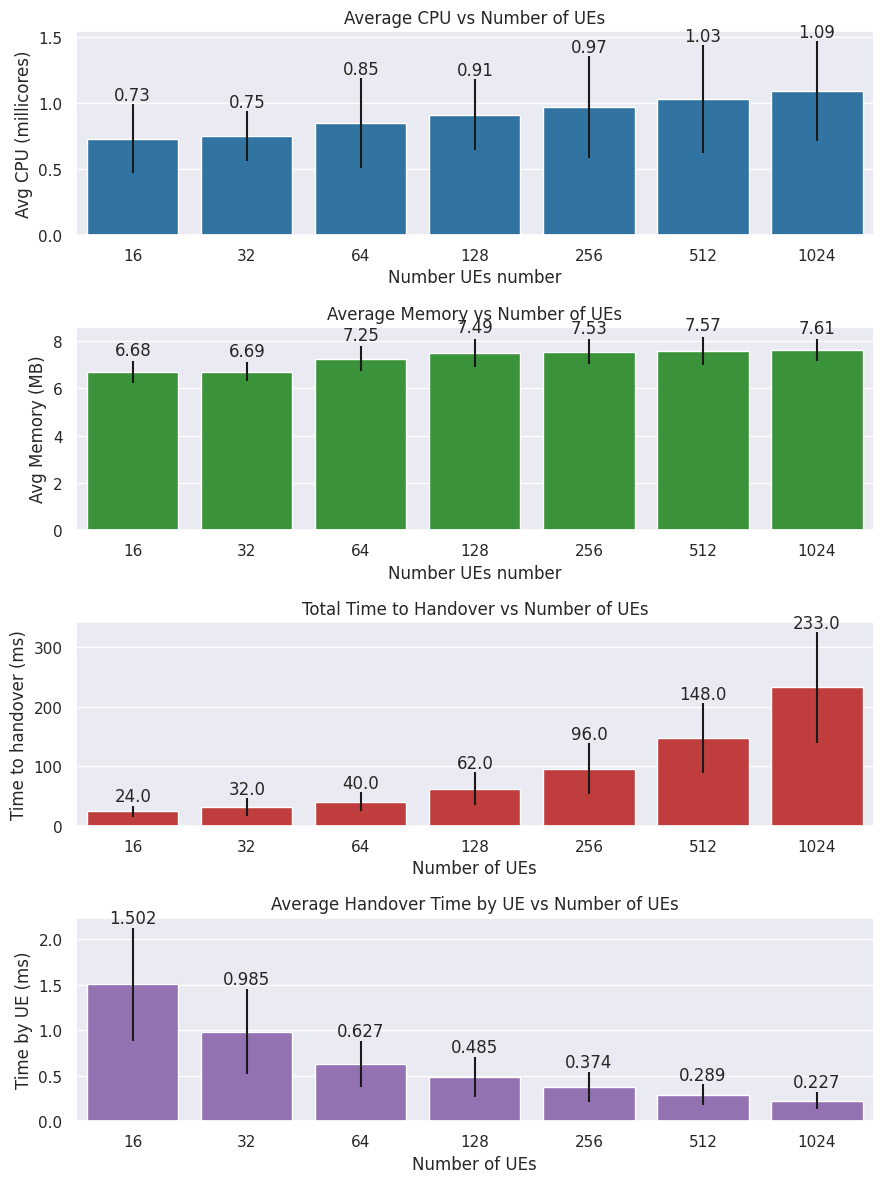

In [6]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(9, 12), sharex=False)

# Bar plot for Avg CPU vs Number UEs
sns.barplot(x='Number UEs number', y='Avg CPU (millicores)', yerr=df['Std Dev CPU'], data=df, ax=axs[0], color='tab:blue')
axs[0].set_title('Average CPU vs Number of UEs')
axs[0].set_ylabel('Avg CPU (millicores)')

# Annotate the values of each bar
for i, v in enumerate(df['Avg CPU (millicores)']):
    axs[0].annotate(str(round(v, 5)), (i, v + df['Std Dev CPU'][i]+0.00001), ha='center', va='bottom')

# Bar plot for Avg Memory vs Number UEs number
sns.barplot(x='Number UEs number', y='Avg Memory (MB)', yerr=df['Std Dev Memory'], data=df, ax=axs[1], color='tab:green')
axs[1].set_title('Average Memory vs Number of UEs')
axs[1].set_ylabel('Avg Memory (MB)')

# Annotate the values of each bar
for i, v in enumerate(df['Avg Memory (MB)']):
    axs[1].annotate(str(round(v, 2)), (i, v + df['Std Dev Memory'][i]+0.1), ha='center', va='bottom')

# Bar plot for Time to solve vs Number UEs
sns.barplot(x='Number UEs str', y='Time (ms)', yerr=df['Std Dev Time'], data=df, ax=axs[2], color='tab:red')
axs[2].set_title('Total Time to Handover vs Number of UEs')
axs[2].set_xlabel('Number of UEs')
axs[2].set_ylabel('Time to handover (ms)')
#axs[2].set_yscale('log')

# Annotate the values of each bar
for i, v in enumerate(df['Time (ms)']):
    axs[2].annotate(str(round(v, 0)), (i, v + df['Std Dev Time'][i]+0.01), ha='center', va='bottom')

# Bar plot for Time by UE vs Number UEs str
sns.barplot(x='Number UEs str', y='Time by UE (ms)', yerr=df['Std Time by UE (ms)'], data=df, ax=axs[3], color='tab:purple')
axs[3].set_title('Average Handover Time by UE vs Number of UEs')
axs[3].set_xlabel('Number of UEs')
axs[3].set_ylabel('Time by UE (ms)')

# Annotate the values of each bar
for i, v in enumerate(df['Time by UE (ms)']):
    axs[3].annotate(str(round(v, 3)), (i, v + df['Std Time by UE (ms)'][i] + 0.01), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('out/xApp-handover.pdf', bbox_inches='tight')
plt.savefig('out/xApp-handover.png', dpi=300, bbox_inches='tight')
plt.show()